# ***Regresión logística - COVID-19.***
>_**Autor:** Nelson David Camacho Ovalle_

>_Universidad Nacional de Colombia: Facultad de Ingienería_
___

# **1. Entendimiento del negocio.**

Una crisis sanitaria como la actual pandemia de COVID-19 nos ofrece la oportunidad de reflexionar sobre lo que logramos mejorar en la forma de abordar la crisis sanitaria para que los seres humanos estemos más preparados y capacitados para combatir un acontecimiento de este tipo en el futuro.

Durante toda la duración de la pandemia, uno de los principales problemas a los que se ha encontrado el personal sanitario es la falta de recursos médicos y de un plan adecuado para distribuirlos eficazmente.

Han estado perdidos sin saber cuántos recursos podrían estar disponibles inclusive en los días siguientes, ya que la curva de contagio ha fluctuado de forma muy imprevisible. En este contexto, ser capaz de predecir qué tipo de recursos o infraestructura requiere un individuo en el momento de dar positivo en la prueba o incluso antes, será de gran ayuda para las dependencias médicas gestionando así los recursos necesarios para tratar esta enfermedad.

<img src="https://ichef.bbci.co.uk/news/800/cpsprodpb/14A35/production/_115033548_gettyimages-1226314512.jpg" alt="COVID-19" width="640" height="380">


Por lo siguiente, los objetivos de este proyecto son:

### **Objetivo del proyecto.**

*   Realizar un entendimiento general de los datos.
*   Visualizar datos generales que provean información del interés frente a la enfermedad con respecto a otras variables.
*   Realizar una regresión que permita evaluar y predecir si una persona puede ser positiva o negativa en COVID-19 previo a obtener resultados de una prueba de contagio.


## **Metodologia**
**CRISP-DM**

<img src="https://www.section.io/engineering-education/data-mining-using-crisp-dm-methodology/crisp-dm-framework.png" alt="Crisp-DM" width="640" height="380">

## **2.  Datos.**
---

### **Adquisición e integación de datos.**
---

In [7]:
#Imporar las Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [8]:
import plotly
import plotly.graph_objs as go 
import plotly.express as px

In [9]:
# Configuraciones de Matplotlib
%matplotlib inline   
plt.rcParams['figure.dpi'] = 110    

In [10]:
# Estilo por defecto para notebooks.
sns.set_theme('notebook')

### **Carga de los datos - Dataset**
---

_*Dataset (Precondición del paciente COVID-19):* https://drive.google.com/u/0/uc?id=1qSFBfBia8um8kN_lOxsuokfdjekrL_GA&export=download_
(https://www.gob.mx/salud/documentos/datos-abiertos-152127)

In [122]:
#DATASET
#NOTA: El Dataset puede demorar en cargar ya que contiene una longitud de 566602

cov = pd.read_csv('https://drive.google.com/u/0/uc?id=1qSFBfBia8um8kN_lOxsuokfdjekrL_GA&export=download')
cov.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [123]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [124]:
#RenombrarColumnas (Ingles a Español)
cov.rename(columns={'sex':'genero','patient_type':'tipoPaciente','entry_date':'fechaEntradaHosp','date_symptoms':'fechaSintoma','date_died':'fechaMuerte','intubed':'intubado','pneumonia':'neumonia','age':'edad','pregnancy':'embarazo','copd':'epoc','asthma':'asma','hypertension':'hipertension','other_disease':'otrasEnfermedades','obesity':'obesidad','renal_chronic':'renalCronica','tobacco':'tabaquismo','contact_other_covid':'contactoOtroCovid','icu':'uci'},inplace=True)
cov.columns

Index(['id', 'genero', 'tipoPaciente', 'fechaEntradaHosp', 'fechaSintoma',
       'fechaMuerte', 'intubado', 'neumonia', 'edad', 'embarazo', 'diabetes',
       'epoc', 'asma', 'inmsupr', 'hipertension', 'otrasEnfermedades',
       'cardiovascular', 'obesidad', 'renalCronica', 'tabaquismo',
       'contactoOtroCovid', 'covid_res', 'uci'],
      dtype='object')

> ### **Descripción de los datos**
___
Con el fin de proseguir, es necesario entender que corresponde cada variable con si descripción y así realizar el proceso de la preparación de los datos.

| Variable          | Descripción                                          | 
| :---------------- | :--------------------------------------------------- | 
| id                | ID del paciente                                      |
| genero            | Mujer - 1, Hombre - 2                                |
| tipoPaciente      | Ambulatorio - 1, Hospitalización - 2                 |
| fechaEntradaHosp  | Fecha de ingreso en el hospital                      |
| fechaSintoma      | Fecha del primer síntoma                             |
| fechaMuerte       | Fecha de la muerte                                   |
| intubado          | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| neumonia          | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| edad              |                                                      |
| embarazo          | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| diabetes          | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| epoc              | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| asma              | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| inmsupr           | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| hipertension      | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| otrasEnfermedades | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| cardiovascular    | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| obesidad          | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| renalCronica      | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| tabaquismo        | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| contactoOtroCovid | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |
| covid_res         | Positivo - 1, Negativo - 2, Esperando resultados - 3 |
| uci               | Sí - 1, No - 2, Datos ausentes o NA - 97,98,99       |

## **3. Preparación de los datos.**
---


Para las columnas (intubado, neumonia, embarazo, diabetes, epoc, asma, inmsupr, hipertension, otrasEnfermedades, carrdiovascular, obesidad, renalCronica, tabaquismo, contactoOtroCovid, Uci) son variable booleanas, por lo tanto la asignación en el dataset corresponde a.

> 1 - Si (True), 2- No (False), 97, 98 o 99 para NaN.

**Primero**, los datos numéricos 97, 98, 99 se convierten en **NaN**, para su correspondiente eliminación usando _dropna_ de la librería **Pandas**.

**Segundo**, se adecuarán los datos booleanos correctamente. Los datos _(2- No (False))_ serán ceros.

**Tercero**, se exportará el modelo ya preparado con fines de crear un _checkpoint_ o _Backup_ del dataset ya preparado.



In [125]:
#Convertir datos nulos en NaN

cov.loc[cov[cov['intubado'] >= 97].index,['intubado']] = np.NaN
cov.loc[cov[cov['neumonia'] >= 97].index,['neumonia']] = np.NaN
cov.loc[cov[cov['embarazo'] >= 97].index,['embarazo']] = np.NaN
cov.loc[cov[cov['intubado'] >= 97].index,['intubado']] = np.NaN
cov.loc[cov[cov['diabetes'] >= 97].index,['diabetes']] = np.NaN
cov.loc[cov[cov['epoc'] >= 97].index,['epoc']] = np.NaN
cov.loc[cov[cov['asma'] >= 97].index,['asma']] = np.NaN
cov.loc[cov[cov['inmsupr'] >= 97].index,['inmsupr']] = np.NaN
cov.loc[cov[cov['hipertension'] >= 97].index,['hipertension']] = np.NaN
cov.loc[cov[cov['otrasEnfermedades'] >= 97].index,['otrasEnfermedades']] = np.NaN
cov.loc[cov[cov['cardiovascular'] >= 97].index,['cardiovascular']] = np.NaN
cov.loc[cov[cov['obesidad'] >= 97].index,['obesidad']] = np.NaN
cov.loc[cov[cov['renalCronica'] >= 97].index,['renalCronica']] = np.NaN
cov.loc[cov[cov['tabaquismo'] >= 97].index,['tabaquismo']] = np.NaN
cov.loc[cov[cov['contactoOtroCovid'] >= 97].index,['contactoOtroCovid']] = np.NaN
cov.loc[cov[cov['uci'] >= 97].index,['uci']] = np.NaN

cov

,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,NaN,2.0,58,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,NaN,2.0,48,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2.0,1.0,49,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,3,2.0
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,NaN,1.0,43,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [129]:
#filtrar datos

prev = cov.shape
cov.dropna(inplace=True)
act = cov.shape
(prev,act)

((23158, 23), (23158, 23))



**Segundo**, se adecuarán los datos booleanos correctamente. Los datos _(2- No (False))_ seran ceros.

In [130]:
#Adecuar valores (2 a 0 como referencia booleana)

cov.loc[:,['intubado','neumonia','embarazo','intubado','diabetes','epoc','asma','inmsupr','hipertension','otrasEnfermedades','cardiovascular','obesidad','renalCronica','tabaquismo','contactoOtroCovid','uci']] = cov.loc[:,['intubado','neumonia','embarazo','intubado','diabetes','epoc','asma','inmsupr','hipertension','otrasEnfermedades','cardiovascular','obesidad','renalCronica','tabaquismo','contactoOtroCovid','uci']].replace(2,0)
cov

,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci
0,154fea,1,2,02-06-2020,02-06-2020,9999-99-99,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
1,16e14e,1,2,22-06-2020,17-06-2020,9999-99-99,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
2,149f1c,1,2,17-06-2020,12-06-2020,9999-99-99,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,1d5df2,1,2,08-06-2020,07-06-2020,9999-99-99,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
4,18f860,1,2,27-05-2020,27-05-2020,9999-99-99,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,70426,1,2,19-06-2020,12-06-2020,9999-99-99,0.0,1.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0.0
23154,0143db,1,2,24-06-2020,21-06-2020,9999-99-99,0.0,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0
23155,188cd4,1,2,06-06-2020,01-06-2020,9999-99-99,0.0,1.0,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0
23156,1d5382,1,2,21-06-2020,16-06-2020,9999-99-99,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0


In [131]:
#Revisión de caracteristicas
#Fecha de muerte 9999-99-99 se interpreta como si el paciente esta vivo. Por lo que se cambiará esta fecha por la etiqueta 'Vivo'

cov['fechaMuerte'].replace("9999-99-99","vivo",inplace=True)
cov.head()

,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci
0,154fea,1,2,02-06-2020,02-06-2020,vivo,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
1,16e14e,1,2,22-06-2020,17-06-2020,vivo,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
2,149f1c,1,2,17-06-2020,12-06-2020,vivo,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,1d5df2,1,2,08-06-2020,07-06-2020,vivo,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
4,18f860,1,2,27-05-2020,27-05-2020,vivo,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,70426,1,2,19-06-2020,12-06-2020,vivo,0.0,1.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0.0
23154,0143db,1,2,24-06-2020,21-06-2020,vivo,0.0,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0
23155,188cd4,1,2,06-06-2020,01-06-2020,vivo,0.0,1.0,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0
23156,1d5382,1,2,21-06-2020,16-06-2020,vivo,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0


In [132]:
#Reestablecer indices de la tabla filtrada
cov.reset_index(drop=True, inplace=True)
cov

,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci
0,154fea,1,2,02-06-2020,02-06-2020,vivo,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
1,16e14e,1,2,22-06-2020,17-06-2020,vivo,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
2,149f1c,1,2,17-06-2020,12-06-2020,vivo,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,1d5df2,1,2,08-06-2020,07-06-2020,vivo,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
4,18f860,1,2,27-05-2020,27-05-2020,vivo,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,70426,1,2,19-06-2020,12-06-2020,vivo,0.0,1.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0.0
23154,0143db,1,2,24-06-2020,21-06-2020,vivo,0.0,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0
23155,188cd4,1,2,06-06-2020,01-06-2020,vivo,0.0,1.0,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0
23156,1d5382,1,2,21-06-2020,16-06-2020,vivo,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0


In [134]:
#Importar Dataset filtrado
cov.to_csv('cov_fix.csv')
#Dataset subido a internet https://drive.google.com/u/0/uc?id=1isNrIteiLO0RpDaWI_6jdgoLhbRMRiym&export=download
cov = pd.read_csv('https://drive.google.com/u/0/uc?id=1isNrIteiLO0RpDaWI_6jdgoLhbRMRiym&export=download') #Checkpoint

## **4. Entendimiento de los datos.**
---

A partir de la tabla ya preparada, se realizará un análisis de los datos, descripciones generales y visualización de estos datos.

### **Descripciones generales**

---

In [135]:
#General
cov.describe()

,Unnamed: 0,genero,tipoPaciente,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci
count,23158.000000,23158.0,23158.0,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000
mean,11578.500000,1.0,2.0,0.110588,0.648415,50.538734,0.024225,0.291519,0.045902,0.033984,0.040720,0.325719,0.044175,0.053545,0.232663,0.047284,0.043916,0.306546,1.607090,0.116504
std,6685.283103,0.0,0.0,0.313628,0.477475,20.730387,0.153750,0.454472,0.209277,0.181192,0.197646,0.468653,0.205488,0.225123,0.422538,0.212250,0.204912,0.461069,0.693461,0.320835
min,0.000000,1.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5789.250000,1.0,2.0,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,11578.500000,1.0,2.0,0.000000,1.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,17367.750000,1.0,2.0,0.000000,1.000000,65.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
max,23157.000000,1.0,2.0,1.000000,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [136]:
#Conteo de contagios

#Nos permite observar el conteo de las personas que estan diagnosticadas como Positivas, Negativas o aun esperan resultados.
cov['covid_res'].value_counts().to_frame()

,covid_res
1,11905
2,8447
3,2806


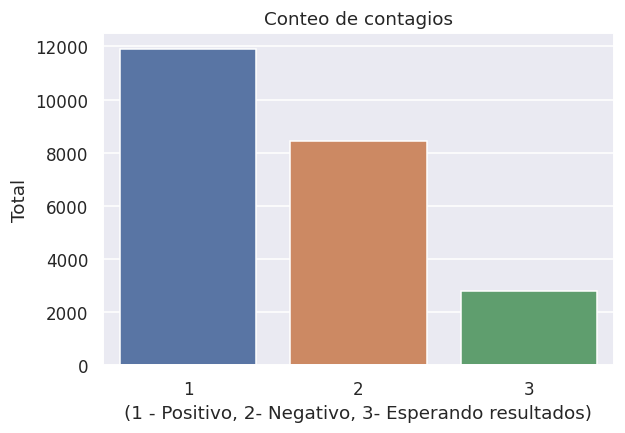

In [137]:
#Visualización del conteo de contagios
countCov = sns.countplot(x='covid_res', data=cov);

countCov.set_title("Conteo de contagios")
countCov.set_xlabel("(1 - Positivo, 2- Negativo, 3- Esperando resultados)")
countCov.set_ylabel("Total");

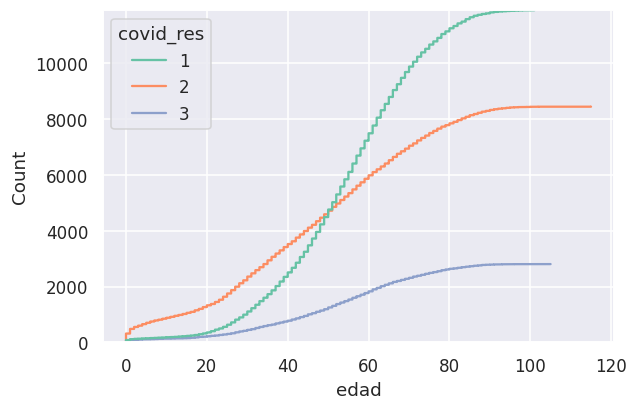

In [42]:
#Conteo de contagios con respecto a la edad.

#Se puede evidenciar que las edades que mayor aportan al conteo maximo de positivos esta entre 40 y 80 años en la que la pendiente de dicha curva crece. 
#Ademas, que las personas que son negativas, crece de una manera casi lineal con la edad, es decir que es constante.

sns.ecdfplot(data = cov, x = 'edad', hue = 'covid_res', stat = 'count', palette = "Set2");

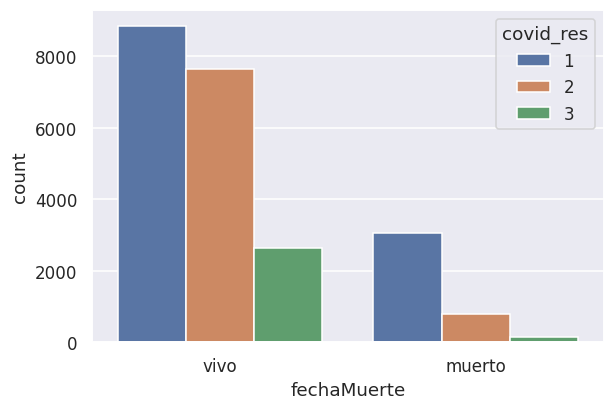

In [47]:
#Conteo de personas vivas o muertas en función de si son positivas, negativas o esperan aun respuesta.

#Como se puede ver, la mayoría de las personas que dieron negativo en el test de Covid están vivas y alrededor de 10.000 personas que dieron positivo en el test de Covid también están vivas.
#Solo un número muy pequeño de personas ha muerto porque sus resultados probablemente se retrasaron y no hubo tiempo de tratarse la enfermedad.


cov.loc[cov['fechaMuerte']!="vivo", 'fechaMuerte'] ="muerto"
sns.countplot(x = 'fechaMuerte', data=cov ,hue= 'covid_res');

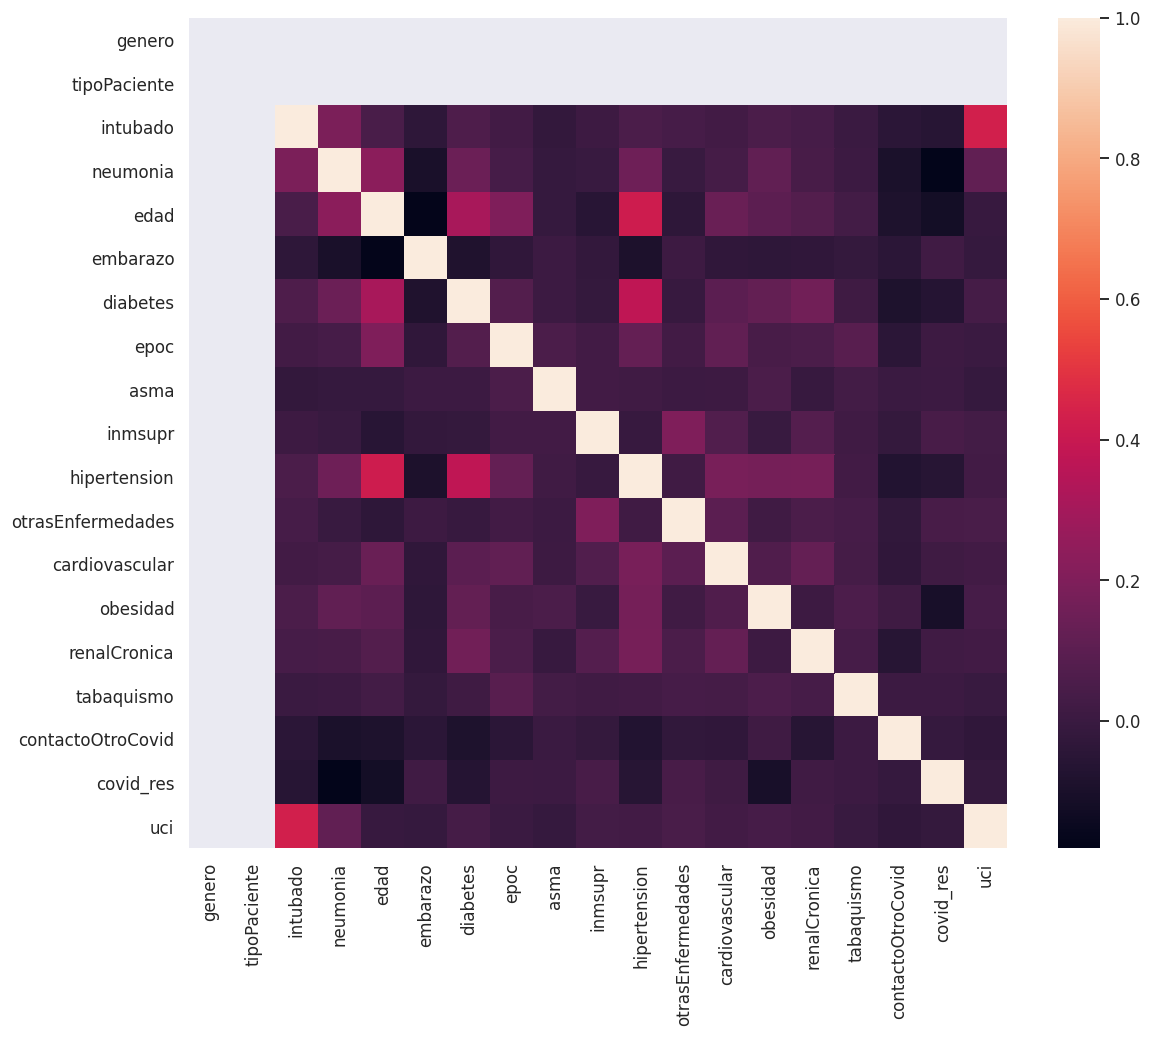

In [48]:
#Correlación

# A traves de la grafica, no se logra identificar una correlación relevante entre las variables del dataset.

plt.subplots(figsize=(12, 10))
sns.heatmap(cov.corr())

## **5. Análisis de datos.**
---

Clasificación con respecto a la variable **covid_res** (Teniendo en cuenta que la variable _covid_res_ es una variable categórica que indica el resultado de la prueba de COVID-19

Como el objetivo es realizar un modelo que pueda predecir variables categóricas binarias, es decir 1 - Positivo y 0- Negativo, se utiliza un análisis de regresión logística.

Para la regresión logística las variables clasificatorias deben estar entre 0 y 1 respectivamente. Por lo que, por motivos ilustrativos el dato (2 - Negativo), será 0. Pero, el dato (3- Esperando respuesta) no se interpretará como 0 o 1 respectivamente con el fin de no sesgar los datos, sino que los datos que contemplen el dato (3 - Esperando respuesta), se utilizará como Dataset de prueba para revisar el modelo obtenido con datos que no se contemplaron en la regresión.

**NOTA:** Es necesario esta adaptación ya que el modelo de regresión logística no permite otros datos clasificatorios que no sean 1 o 0.


In [76]:
#Adecuar los datos en función de las variables clasificatorias.

cov['covid_res'].replace([1,2],[1,0],inplace=True)
cov['covid_res'].value_counts()

1    11905
0     8447
3     2806
Name: covid_res, dtype: int64

### **Separación del Dataset**
___

In [63]:
#Separación de Dataset

#1 - Dataset con los datos de la regresión (1- Positivo, 0 - Negativo)
covTrain = cov.loc[cov['covid_res'] <= 1].reset_index(drop=True)

#2- Dataset de testeo con personas que aun esperan su resultado (3 - Esperando respuesta)
covTest = cov.loc[cov['covid_res'] == 3].reset_index(drop=True)

#Compración entre longitudes del dataset de referencia, con los dataset de entrenamiento al modelo y los de prueba.
(len(cov), len(covTrain), len(covTest))

(23158, 20352, 2806)

### **Entrenamiento del modelo logistico**
___

In [78]:
#Obtención del modelo con diferentes valores
model = smf.logit("covid_res ~ intubado + neumonia + edad + embarazo + diabetes + epoc + asma + inmsupr + hipertension + otrasEnfermedades + cardiovascular + obesidad + renalCronica + tabaquismo + contactoOtroCovid + uci",data=covTrain)

result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.624406
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              covid_res   No. Observations:                20352
Model:                          Logit   Df Residuals:                    20335
Method:                           MLE   Df Model:                           16
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                 0.07992
Time:                        01:39:44   Log-Likelihood:                -12708.
converged:                       True   LL-Null:                       -13812.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1592      0.048    -24.308      0.000      -1.253      -1.066
intubado              0.1739      0.055      3.187      0.001       0.067       0.281
neumonia              0.7326      0.033     22.322      0.000       0.668       0.797
edad                  0.0192      0.001     22.222      0.000       0.017       0.021
embarazo              0.0696      0.096      0.728      0.467      -0.118       0.257
diabetes              0.1040      0.037      2.807      0.005       0.031       0.177
epoc                 -0.7848      0.071    -11.018      0.000      -0.924      -0.645
asma                 -0.0167      0.083     -0.202      0.840      -0.179       0.145
inmsupr              -0.5242      0.079     -6.673      0.000      -0.678      -0.370
hipertension         -0.0252      0.038     -0.663      0.507      -0.100       0.049
otrasEnfermedades    -0.7195      0.075     -9.572      0.000      -0.867      -0.572
cardiovascular       -0.5456      0.068     -8.011      0.000      -0.679      -0.412
obesidad              0.4573      0.037     12.296      0.000       0.384       0.530
renalCronica         -0.6091      0.071     -8.575      0.000      -0.748      -0.470
tabaquismo           -0.2751      0.072     -3.835      0.000      -0.416      -0.134
contactoOtroCovid     0.3169      0.034      9.437      0.000       0.251       0.383
uci                  -0.0418      0.053     -0.796      0.426      -0.145       0.061
=====================================================================================
"""

Hay datos que no aportan al desarrollo del modelo y son aquellos que correspondan con un p-value mayor al valor de significancia. Teniendo un valor de significancia del 5% (0.05), los datos que no aportan al modelo son.

**Embarazo, asma, hipertensión, uci.**


In [79]:
# Retirando las variables que no aportan al desarrollo del modelo

model = smf.logit("covid_res ~ intubado + neumonia + edad + diabetes + epoc + inmsupr + otrasEnfermedades + cardiovascular + obesidad + renalCronica + tabaquismo + contactoOtroCovid",data=covTrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.624446
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              covid_res   No. Observations:                20352
Model:                          Logit   Df Residuals:                    20339
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                 0.07986
Time:                        01:42:01   Log-Likelihood:                -12709.
converged:                       True   LL-Null:                       -13812.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1511      0.046    -25.218      0.000      -1.241      -1.062
intubado              0.1555      0.050      3.127      0.002       0.058       0.253
neumonia              0.7293      0.033     22.308      0.000       0.665       0.793
edad                  0.0189      0.001     23.305      0.000       0.017       0.021
diabetes              0.0967      0.036      2.697      0.007       0.026       0.167
epoc                 -0.7864      0.071    -11.059      0.000      -0.926      -0.647
inmsupr              -0.5275      0.078     -6.724      0.000      -0.681      -0.374
otrasEnfermedades    -0.7208      0.075     -9.597      0.000      -0.868      -0.574
cardiovascular       -0.5514      0.068     -8.144      0.000      -0.684      -0.419
obesidad              0.4535      0.037     12.287      0.000       0.381       0.526
renalCronica         -0.6156      0.070     -8.734      0.000      -0.754      -0.477
tabaquismo           -0.2747      0.072     -3.831      0.000      -0.415      -0.134
contactoOtroCovid     0.3158      0.033      9.433      0.000       0.250       0.381
=====================================================================================
"""

**Teniendo en cuenta la ecuación del modelo de regresión logístico**


$ \LARGE\frac{1}{1+e^{-\left(B_0+B_1\cdot x_1+B_2\cdot x_1\:...\:B_n\cdot x_n\right)}}$

Es necesario obtener los parámetros del modelo para así crear la ecuación que permita predecir según los criterios dados.

In [80]:
b = model.params
b

Intercept           -1.151084
intubado             0.155462
neumonia             0.729330
edad                 0.018934
diabetes             0.096734
epoc                -0.786352
inmsupr             -0.527457
otrasEnfermedades   -0.720849
cardiovascular      -0.551372
obesidad             0.453473
renalCronica        -0.615578
tabaquismo          -0.274746
contactoOtroCovid    0.315782
dtype: float64

### **Realización del modelo predictivo**
___

> **NOTA:** Se evalúan el modelo referente y el modelo optimizado (Quitan las variables con P-Valor alto en función del índice de significancia $5\%$ con el fin de comparar y concluir la elección del modelo.

In [81]:
#Realización del modelo sin optimizar

def covid_logit(modelo):

    model = smf.logit("covid_res ~ intubado + neumonia + edad + embarazo + diabetes + epoc + asma + inmsupr + hipertension + otrasEnfermedades + cardiovascular + obesidad + renalCronica + tabaquismo + contactoOtroCovid + uci",data=modelo).fit();
    b = model.params

    y = 1 / (1 + np.exp(-(b[0] + (b[1]*modelo['intubado']) + (b[2]*modelo['neumonia']) + (b[3]*modelo['edad']) + (b[4]*modelo['embarazo']) + (b[5]*modelo['diabetes']) + (b[6]*modelo['epoc']) + (b[7]*modelo['asma']) + (b[8]*modelo['inmsupr']) + 
    (b[9]*modelo['hipertension']) + (b[10]*modelo['otrasEnfermedades']) +(b[11]*modelo['cardiovascular']) + (b[12]*modelo['obesidad'])+ (b[13]*modelo['renalCronica']) + (b[14]*modelo['tabaquismo']) +  (b[15]*modelo['contactoOtroCovid']) + 
    (b[16]*modelo['uci'])) ) ).reset_index(drop=True)

    return y.values

In [82]:
#Realización del modelo optimizado

def covid_logit_opt(modelo):

    model = smf.logit("covid_res ~ intubado + neumonia + edad + diabetes + epoc + inmsupr + otrasEnfermedades + cardiovascular + obesidad + renalCronica + tabaquismo + contactoOtroCovid",data=modelo).fit();
    b = model.params

    y = 1 / (1 + np.exp(-(b[0] + (b[1]*modelo['intubado']) + (b[2]*modelo['neumonia']) + (b[3]*modelo['edad']) + (b[4]*modelo['diabetes']) + (b[5]*modelo['epoc']) +  (b[6]*modelo['inmsupr']) + (b[7]*modelo['otrasEnfermedades']) + 
    (b[8]*modelo['cardiovascular']) + (b[9]*modelo['renalCronica']) + (b[10]*modelo['tabaquismo']) +  (b[11]*modelo['contactoOtroCovid']) ) ) ).reset_index(drop=True)

    return y.values


> **NOTA:** Se crea una función que permita evaluar los datos de las personas que aún esperan respuesta _(covTest)_ con el modelo optimizado.

In [83]:
#Evaluar un modelo con respecto a datos no vistos o test.

def TestCovidLogitOpt(modeloEvaluado,modeloTest):

    model = smf.logit("covid_res ~ intubado + neumonia + edad + diabetes + epoc + inmsupr + otrasEnfermedades + cardiovascular + obesidad + renalCronica + tabaquismo + contactoOtroCovid",data=modeloEvaluado).fit();
    b = model.params

    y = 1 / (1 + np.exp(-(b[0] + (b[1]*modeloTest['intubado']) + (b[2]*modeloTest['neumonia']) + (b[3]*modeloTest['edad']) + (b[4]*modeloTest['diabetes']) + (b[5]*modeloTest['epoc']) +  (b[6]*modeloTest['inmsupr']) + (b[7]*modeloTest['otrasEnfermedades']) + 
    (b[8]*modeloTest['cardiovascular']) + (b[9]*modeloTest['renalCronica']) + (b[10]*modeloTest['tabaquismo']) +  (b[11]*modeloTest['contactoOtroCovid']) ) ) ).reset_index(drop=True)

    
    return y.values


### **Evaluación de los modelos**

___

#### **1. Modelo no optimizado**

In [89]:
#Evaluar en modelo no optimizado (Obtener la presición del modelo)

y = covid_logit(covTrain)
covTrain['modeloLogit'] = y
covTrain['prediccion'] = np.rint(y)
covTrain.loc[:,'acierto'] = np.where(covTrain['prediccion']==covTrain['covid_res'],True,False)

covTrain

Optimization terminated successfully.
         Current function value: 0.624406
         Iterations 5


,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci,modeloLogit,prediccion,acierto
0,154fea,1,2,02-06-2020,02-06-2020,vivo,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.410194,0.0,False
1,16e14e,1,2,22-06-2020,17-06-2020,vivo,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0,0.583318,1.0,True
2,149f1c,1,2,17-06-2020,12-06-2020,vivo,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.704255,1.0,True
3,1d5df2,1,2,08-06-2020,07-06-2020,vivo,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.868091,1.0,True
4,18f860,1,2,27-05-2020,27-05-2020,vivo,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.754903,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20347,13d4ad,1,2,01-06-2020,28-05-2020,vivo,0.0,1.0,80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.770368,1.0,False
20348,0130ad,1,2,29-03-2020,23-03-2020,vivo,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.286989,0.0,True
20349,1159a4,1,2,01-04-2020,01-04-2020,muerto,1.0,0.0,23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.176668,0.0,True
20350,19ecd3,1,2,25-03-2020,22-03-2020,vivo,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.389544,0.0,True


In [90]:
accuracy1 = covTrain['acierto'].mean() # En la suma los valores booleanos True y False se interpretan como 1 y 0.
print(accuracy1)

0.6628832547169812


#### **2. Modelo optimizado**

In [91]:
#Evaluar en modelo optimizado

y = covid_logit_opt(covTrain)
covTrain['modeloLogit'] = y
covTrain['prediccion'] = np.rint(y)
covTrain.loc[:,'acierto'] = np.where(covTrain['prediccion']==covTrain['covid_res'],True,False)

covTrain

Optimization terminated successfully.
         Current function value: 0.624446
         Iterations 5


,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci,modeloLogit,prediccion,acierto
0,154fea,1,2,02-06-2020,02-06-2020,vivo,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.278387,0.0,False
1,16e14e,1,2,22-06-2020,17-06-2020,vivo,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0,0.257916,0.0,False
2,149f1c,1,2,17-06-2020,12-06-2020,vivo,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.566883,1.0,True
3,1d5df2,1,2,08-06-2020,07-06-2020,vivo,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.695146,1.0,True
4,18f860,1,2,27-05-2020,27-05-2020,vivo,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.626528,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20347,13d4ad,1,2,01-06-2020,28-05-2020,vivo,0.0,1.0,80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.766690,1.0,False
20348,0130ad,1,2,29-03-2020,23-03-2020,vivo,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.288036,0.0,True
20349,1159a4,1,2,01-04-2020,01-04-2020,muerto,1.0,0.0,23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.130498,0.0,True
20350,19ecd3,1,2,25-03-2020,22-03-2020,vivo,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.400635,0.0,True


In [92]:
accuracy2 = covTrain['acierto'].mean() # En la suma los valores booleanos True y False se interpretan como 1 y 0.
print(accuracy2)

0.6374803459119497


#### **Conclusiones de los modelos logisticos**

In [93]:
(accuracy1, accuracy2)

(0.6628832547169812, 0.6374803459119497)

> Se concluye que el modelo no optimizado tiene mayor índice de precisión que el modelo optimizado. Pero, el valor agregado de las variables que no aportan al modelo según el p-value con una significancia del $5\%$, solo aumentan la precisión del modelo en un $2.5\%$.

#### **Predicción con datos de prueba**

In [94]:
#Evaluar el modelo optimizado con los datos no utilizados para la regresión logistica y observar las predicciones del modelo para las personas que esperan las respuestas (3 - Respuestas)

yTest = TestCovidLogitOpt(covTrain,covTest)
covTest['modeloLogit'] = yTest
covTest['prediccion'] = np.rint(yTest)

covTest

Optimization terminated successfully.
         Current function value: 0.624446
         Iterations 5


,id,genero,tipoPaciente,fechaEntradaHosp,fechaSintoma,fechaMuerte,intubado,neumonia,edad,embarazo,diabetes,epoc,asma,inmsupr,hipertension,otrasEnfermedades,cardiovascular,obesidad,renalCronica,tabaquismo,contactoOtroCovid,covid_res,uci,modeloLogit,prediccion
0,158aff,1,2,06-06-2020,06-06-2020,vivo,0.0,1.0,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.557563,1.0
1,0f2157,1,2,25-06-2020,24-06-2020,vivo,0.0,1.0,70,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.731132,1.0
2,137823,1,2,24-06-2020,12-06-2020,vivo,0.0,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.343096,0.0
3,044d69,1,2,29-06-2020,27-06-2020,vivo,0.0,1.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.522352,1.0
4,1a55e6,1,2,24-06-2020,23-06-2020,vivo,0.0,1.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.589964,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,70426,1,2,19-06-2020,12-06-2020,vivo,0.0,1.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0.0,0.481520,0.0
2802,0143db,1,2,24-06-2020,21-06-2020,vivo,0.0,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.317966,0.0
2803,188cd4,1,2,06-06-2020,01-06-2020,vivo,0.0,1.0,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,0.658697,1.0
2804,1d5382,1,2,21-06-2020,16-06-2020,vivo,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.303814,0.0


#### **Visualización de los resultados predictorios**

In [120]:
#Visualización de datos con respecto a la predicción de las personas que esperan resultados.
px.histogram(covTest, x="prediccion", color='prediccion',width=640, title='Conteo de contagios')


In [112]:
px.violin(covTest, x="prediccion", y="edad",color='prediccion', title = 'Predicción - Contagios por edad', width=640)


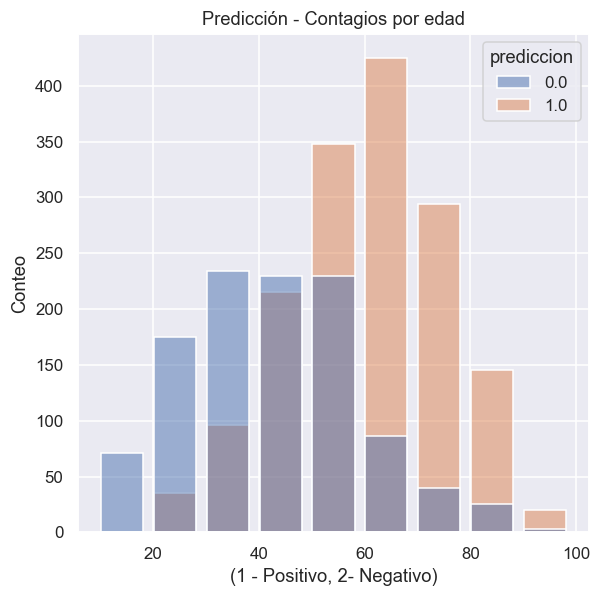

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.histplot(covTest,x='edad',hue ='prediccion', bins= [10,20,30,40,50,60,70,80,90,100], shrink=.8)

ax.set_title('Predicción - Contagios por edad')
ax.set_xlabel("(1 - Positivo, 2- Negativo)")
ax.set_ylabel("Conteo");

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Estudiante:** [Nelson David Camacho Ovalle](https://www.linkedin.com/in/ndcamacho/)

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*